In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14,
     'errorbar.capsize': 4
    }
    )

In [2]:
data_table_F2_2001_1 = None
data_table_F2_2001_2 = None
data_table_F2_2003 = None
with open( "HEPData/H12001-HEPData-ins539089-Table_1.json" ) as f:
    data_table_F2_2001_1 = json.load( f )
with open( "HEPData/H12001-HEPData-ins539089-Table_2.json" ) as f:
    data_table_F2_2001_2 = json.load( f )
with open( "HEPData/H12003-HEPData-ins616311-Table_6.json" ) as f:
    data_table_F2_2003 = json.load( f )

In [3]:
from get_df_json_H1 import *

def process_df_2001( df ):
    df.loc[ :, 'tot' ] = np.sqrt( df.loc[ :, 'stat' ] ** 2 + df.loc[ :, 'sys_1' ] ** 2 + df.loc[ :, 'sys_2' ] ** 2 )
    df = df.drop( [ 'sys_1', 'sys_2' ], axis=1 )
    return df
    
def process_df_2003( df ):
    df.loc[ :, 'tot' ] = np.sqrt( df.loc[ :, 'stat' ] ** 2 + df.loc[ :, 'sys' ] ** 2 )
    df = df.drop( [ 'sys' ], axis=1 )
    return df

df_F2_2001_1 = get_df_json_H1( data_table_F2_2001_1, "F2")
df_F2_2001_1 = process_df_2001( df_F2_2001_1 )
df_F2_2001_2 = get_df_json_H1( data_table_F2_2001_2, "F2")
df_F2_2001_2 = process_df_2001( df_F2_2001_2 )
df_F2_2003 = get_df_json_H1( data_table_F2_2003, "F2")
df_F2_2003 = process_df_2003( df_F2_2003 )


['Q**2 [GEV]', 'X', 'Y', 'R(C=SIGL/SIGT)', 'F2', 'SIG(C=REDUCED)']
1.5, 3.2e-05, 0.518, F2 = 0.832, stat = 0.011, sys_1 = 0.029, sys_2 = 0.033
1.5, 5e-05, 0.331, F2 = 0.752, stat = 0.014, sys_1 = 0.029, sys_2 = 0.017
1.5, 8e-05, 0.207, F2 = 0.702, stat = 0.029, sys_1 = 0.048, sys_2 = 0.022
2.0, 5e-05, 0.442, F2 = 0.851, stat = 0.008, sys_1 = 0.024, sys_2 = 0.016
2.0, 8e-05, 0.276, F2 = 0.748, stat = 0.007, sys_1 = 0.02, sys_2 = 0.015
2.0, 0.00013, 0.17, F2 = 0.716, stat = 0.009, sys_1 = 0.021, sys_2 = 0.013
2.0, 0.0002, 0.111, F2 = 0.654, stat = 0.008, sys_1 = 0.02, sys_2 = 0.022
2.0, 0.00032, 0.069, F2 = 0.626, stat = 0.009, sys_1 = 0.019, sys_2 = 0.018
2.0, 0.0005, 0.044, F2 = 0.62, stat = 0.009, sys_1 = 0.02, sys_2 = 0.029
2.0, 0.001, 0.022, F2 = 0.513, stat = 0.006, sys_1 = 0.015, sys_2 = 0.016
2.0, 0.0032, 0.007, F2 = 0.424, stat = 0.006, sys_1 = 0.018, sys_2 = 0.02
2.5, 5e-05, 0.552, F2 = 0.909, stat = 0.012, sys_1 = 0.02, sys_2 = 0.025
2.5, 8e-05, 0.345, F2 = 0.828, stat = 0.007

In [4]:
df_F2 = pd.concat( [ df_F2_2001_1, df_F2_2001_2, df_F2_2003 ] )
df_F2

,Q2,x,y,F2,stat,tot
0,1.5,0.000032,0.518,0.8320,0.0110,0.045288
1,1.5,0.000050,0.331,0.7520,0.0140,0.036414
2,1.5,0.000080,0.207,0.7020,0.0290,0.060241
3,2.0,0.000050,0.442,0.8510,0.0080,0.029933
4,2.0,0.000080,0.276,0.7480,0.0070,0.025962
...,...,...,...,...,...,...
112,3000.0,0.650000,0.045,0.0113,0.0033,0.003808
113,5000.0,0.080000,0.615,0.4750,0.0330,0.038588
114,5000.0,0.130000,0.379,0.3590,0.0300,0.033541
115,5000.0,0.180000,0.273,0.2690,0.0250,0.028178


In [5]:
df_F2_index = df_F2.set_index( ['x', 'Q2' ] ).sort_index()
df_F2_index

y      F2    stat       tot
x        Q2                                     
0.000032 1.5     0.518  0.8320  0.0110  0.045288
0.000050 1.5     0.331  0.7520  0.0140  0.036414
         2.0     0.442  0.8510  0.0080  0.029933
         2.5     0.552  0.9090  0.0120  0.034191
0.000080 1.5     0.207  0.7020  0.0290  0.060241
...                ...     ...     ...       ...
0.650000 1000.0  0.015  0.0214  0.0038  0.005967
         1200.0  0.018  0.0230  0.0045  0.006507
         1500.0  0.023  0.0160  0.0048  0.005714
         2000.0  0.030  0.0287  0.0068  0.009003
         3000.0  0.045  0.0113  0.0033  0.003808

[236 rows x 4 columns]

In [6]:
Q2_min = 100.
df_F2_index = df_F2_index.query( 'Q2 >= {:f}'.format( Q2_min ) )
df_F2_index

y      F2    stat       tot
x      Q2                                     
0.0020 100.0   0.492  1.4420  0.0200  0.043829
       120.0   0.591  1.4180  0.0210  0.040817
0.0032 120.0   0.369  1.2410  0.0160  0.031385
       150.0   0.462  1.2620  0.0150  0.036249
0.0050 120.0   0.266  1.0190  0.0240  0.037121
...              ...     ...     ...       ...
0.6500 1000.0  0.015  0.0214  0.0038  0.005967
       1200.0  0.018  0.0230  0.0045  0.006507
       1500.0  0.023  0.0160  0.0048  0.005714
       2000.0  0.030  0.0287  0.0068  0.009003
       3000.0  0.045  0.0113  0.0033  0.003808

[120 rows x 4 columns]

In [7]:
arr_group_size = df_F2_index.groupby( ['x', 'Q2'] ).size()
np.sum( arr_group_size != 1 )

0

In [8]:
index_x = df_F2_index.index.get_level_values( 0 ).drop_duplicates()
index_x

Float64Index([ 0.002, 0.0032,  0.005,  0.008,  0.013,   0.02,  0.032,   0.05,
                0.08,   0.13,   0.18,   0.25,    0.4,   0.65],
             dtype='float64', name='x')

In [9]:
index_x_sel = index_x[ index_x >= 0.008 ]
msk = ( np.arange( int( len(index_x_sel) ) ) % 2 == 0 )
index_x_sel = index_x_sel[ msk ]
index_x_sel

Float64Index([0.008, 0.02, 0.05, 0.13, 0.25, 0.65], dtype='float64', name='x')

In [10]:
for x__ in index_x_sel:
    print ( x__, df_F2_index.loc[ x__, [ 'F2', 'tot' ] ] )

0.008           F2       tot
Q2                    
120.0  0.841  0.025000
150.0  0.942  0.030887
200.0  0.961  0.025060
250.0  0.951  0.027785
300.0  1.008  0.030232
400.0  1.053  0.037014
0.02            F2       tot
Q2                     
200.0   0.713  0.019416
250.0   0.710  0.021095
300.0   0.708  0.022204
400.0   0.732  0.025000
500.0   0.722  0.027659
650.0   0.755  0.031828
800.0   0.764  0.036069
1000.0  0.761  0.039699
1200.0  0.803  0.047434
0.05            F2       tot
Q2                     
200.0   0.516  0.024166
250.0   0.513  0.018358
300.0   0.490  0.018868
400.0   0.512  0.020000
500.0   0.536  0.022804
650.0   0.518  0.022627
800.0   0.553  0.025495
1000.0  0.557  0.030480
1200.0  0.477  0.027459
1500.0  0.590  0.035355
2000.0  0.481  0.040706
3000.0  0.585  0.040224
0.13            F2       tot
Q2                     
200.0   0.345  0.018358
250.0   0.342  0.015652
300.0   0.355  0.017000
400.0   0.356  0.014213
500.0   0.344  0.016971
650.0   0.374  0.019105
800

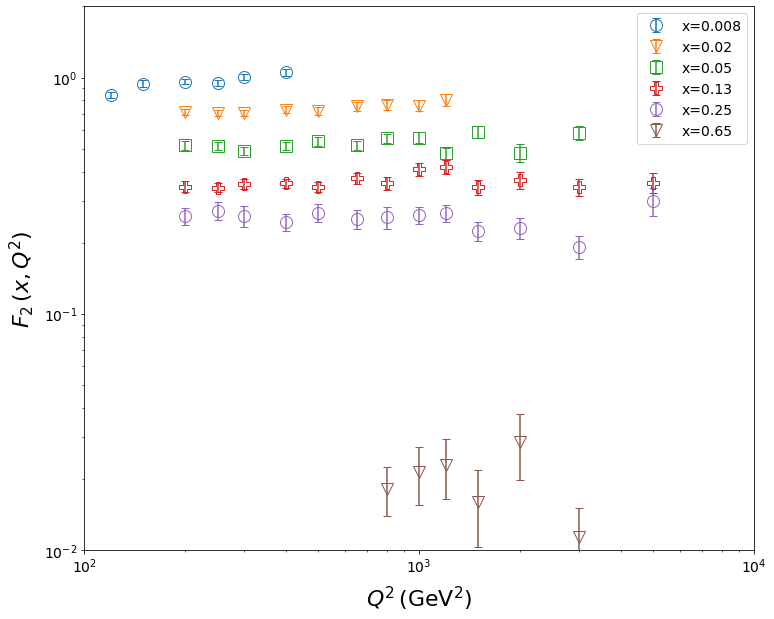

In [11]:
save_figures = True

fig = plt.figure( figsize=(12,10) )
markers = [ 'o', 'v', 's', 'P' ]
for idx__, x__ in enumerate( index_x_sel ):
    df__ = df_F2_index.loc[ x__, [ 'F2', 'tot' ] ]
    val__ = df__.loc[ :, 'F2' ]
    err__ = df__.loc[ :, 'tot' ]
    plt.errorbar( df__.index, val__, yerr=err__, label="x={}".format( x__ ), marker=markers[ idx__ % len(markers) ], fillstyle='none', markersize=12, linestyle='none' )

plt.xlabel( r'$Q^2\,(\rm{GeV}^2)$' )
plt.ylabel( r'$F_2\,(x,Q^2)$' )
plt.xlim( 1e+02, 1e+04 )
plt.ylim( 1e-02, 2e+00 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )

if save_figures:
    plt.savefig( "figs/F2_Q2_100_x_sel.pdf", bbox_inches='tight' )
    plt.savefig( "figs/F2_Q2_100_x_sel.png", bbox_inches='tight' )